# Problem  Statement



input: loan.csv 

CSV file contains the data which provides the complete information about the bank loans, loan amounts, repayments, Fully paid/not etc 

Objective of the excercise : The company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables 
which are strong indicators of default. The company can utilise this knowledge for its portfolio and risk assessment. 

# Importing the libraries

In [1]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [2]:
#read the dataset and check the first five rows to get an idea of the datas
loan_df = pd.read_csv('loan.csv', low_memory=False)
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
#Check the shape of the dataframe
loan_df.shape

(39717, 111)

We have total 111 column and 39717 rows, which may not be needed hence will select only needed column and reject others in the next set of codes.

In [4]:
#To get the information of each and every colums like category of data types present in the csv file 
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


Since the information for every column is not provided we are going for next command

In [5]:
#datatype of each column is understood using the below commands 
column_data_types = loan_df.dtypes
column_data_types

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

# Data understanding

Looks like the column list is way bigger we are not able to see complete list 

In [6]:
# Select the desired columns
selected_columns = ['id', 'funded_amnt', 'term', 'int_rate', 'installment', 'verification_status','home_ownership','annual_inc', 'loan_status', 'purpose', 'dti', 'grade', 'addr_state', 'sub_grade', 'emp_length','delinq_2yrs' ]  
sel_loan_df = loan_df[selected_columns]
sel_loan_df.to_csv('selected_loan.csv', index=False)

In [7]:
#Check the shape of the dataframe
sel_loan_df.shape

(39717, 16)

In [8]:
#To get the information of each and every colums like category of data types present in the csv file 
sel_loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   39717 non-null  int64  
 1   funded_amnt          39717 non-null  int64  
 2   term                 39717 non-null  object 
 3   int_rate             39717 non-null  object 
 4   installment          39717 non-null  float64
 5   verification_status  39717 non-null  object 
 6   home_ownership       39717 non-null  object 
 7   annual_inc           39717 non-null  float64
 8   loan_status          39717 non-null  object 
 9   purpose              39717 non-null  object 
 10  dti                  39717 non-null  float64
 11  grade                39717 non-null  object 
 12  addr_state           39717 non-null  object 
 13  sub_grade            39717 non-null  object 
 14  emp_length           38642 non-null  object 
 15  delinq_2yrs          39717 non-null 

From above info it is clear that, data are not missed and count of dtypes: float64(3), int64(2), object(8)

Some colums are not expected to be object type, they shall be either int or float, will convert them as needed.
List of columns which are non suppose to be object type: 'int_rate'
   

In [9]:
# To check the distinct data present in 'int_rate' column so that it will be easy to convert from object type to float. 
# we can see that all the values are float followed by %
sel_loan_df.int_rate.value_counts()

int_rate
10.99%    956
13.49%    826
11.49%    825
7.51%     787
7.88%     725
         ... 
18.36%      1
16.96%      1
16.15%      1
16.01%      1
17.44%      1
Name: count, Length: 371, dtype: int64

# Data cleanup and manipulation

In [10]:
#Convert the datas to float type by removing '%' key from the 'int_rate' column data
sel_loan_df.loc[:, 'int_rate'] = sel_loan_df.loc[:, 'int_rate'].str.replace('%', '')


In [11]:
#Convert the datas to float type by removing '+' 'years' 'year' and '<' key from the 'emp_length' column data
sel_loan_df.loc[:, 'emp_length'] = sel_loan_df.loc[:, 'emp_length'].str.replace('+', '').str.replace('years', '').str.replace('year', '').str.replace('<', '')

From above it is clear that int_rate and emp_length is cleared properly

In [12]:
sel_loan_df.to_csv('selected_loan.csv', index=False)

In [13]:
sel_loan_df = pd.read_csv('selected_loan.csv', low_memory=False)

In [14]:
sel_loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   39717 non-null  int64  
 1   funded_amnt          39717 non-null  int64  
 2   term                 39717 non-null  object 
 3   int_rate             39717 non-null  float64
 4   installment          39717 non-null  float64
 5   verification_status  39717 non-null  object 
 6   home_ownership       39717 non-null  object 
 7   annual_inc           39717 non-null  float64
 8   loan_status          39717 non-null  object 
 9   purpose              39717 non-null  object 
 10  dti                  39717 non-null  float64
 11  grade                39717 non-null  object 
 12  addr_state           39717 non-null  object 
 13  sub_grade            39717 non-null  object 
 14  emp_length           38642 non-null  float64
 15  delinq_2yrs          39717 non-null 

From above we can see that emp_length and int_rate are modified to the actual data types

In [15]:
sel_loan_df.head()

,id,funded_amnt,term,int_rate,installment,verification_status,home_ownership,annual_inc,loan_status,purpose,dti,grade,addr_state,sub_grade,emp_length,delinq_2yrs
0,1077501,5000,36 months,10.65,162.87,Verified,RENT,24000.0,Fully Paid,credit_card,27.65,B,AZ,B2,10.0,0
1,1077430,2500,60 months,15.27,59.83,Source Verified,RENT,30000.0,Charged Off,car,1.00,C,GA,C4,1.0,0
2,1077175,2400,36 months,15.96,84.33,Not Verified,RENT,12252.0,Fully Paid,small_business,8.72,C,IL,C5,10.0,0
3,1076863,10000,36 months,13.49,339.31,Source Verified,RENT,49200.0,Fully Paid,other,20.00,C,CA,C1,10.0,0
4,1075358,3000,60 months,12.69,67.79,Source Verified,RENT,80000.0,Current,other,17.94,B,OR,B5,1.0,0


In [16]:
# To check any outliers present in the 'annual_inc' 
sel_loan_df.annual_inc.describe()

count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [17]:
# No outliers in the experience even though 10 represents anythings beyond 10 years and maximum experience usually less than 40 years.
sel_loan_df.emp_length.value_counts()

emp_length
10.0    8879
1.0     7823
2.0     4388
3.0     4095
4.0     3436
5.0     3282
6.0     2229
7.0     1773
8.0     1479
9.0     1258
Name: count, dtype: int64

In [18]:
sel_loan_df.sub_grade.value_counts()

sub_grade
B3    2917
A4    2886
A5    2742
B5    2704
B4    2512
C1    2136
B2    2057
C2    2011
B1    1830
A3    1810
C3    1529
A2    1508
D2    1348
C4    1236
C5    1186
D3    1173
A1    1139
D4     981
D1     931
D5     874
E1     763
E2     656
E3     553
E4     454
E5     416
F1     329
F2     249
F3     185
F4     168
F5     118
G1     104
G2      78
G4      56
G3      48
G5      30
Name: count, dtype: int64

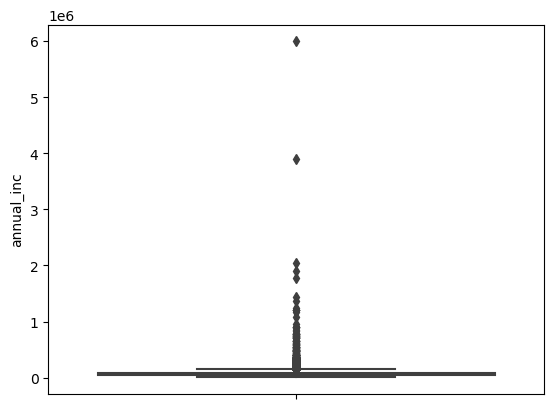

In [19]:
# To check  the outliers from the box graph 
sns.boxplot(y='annual_inc', data = sel_loan_df)
plt.show()

In [20]:
# I am selecting  1.300000e+05 even though we are losing only 7% of the data and 93% people resides less than 1.3e+05
sel_loan_df[sel_loan_df.annual_inc < 1.300000e+05].annual_inc.describe()

count     36977.000000
mean      59540.501073
std       25975.139049
min        4000.000000
25%       40000.000000
50%       55000.000000
75%       75000.000000
max      129996.000000
Name: annual_inc, dtype: float64

In [21]:
# sel_loan_df is updated with those tables which has annula_inc is less than 1.3e+5
sel_loan_df = sel_loan_df[sel_loan_df.annual_inc < 1.30000e+05]

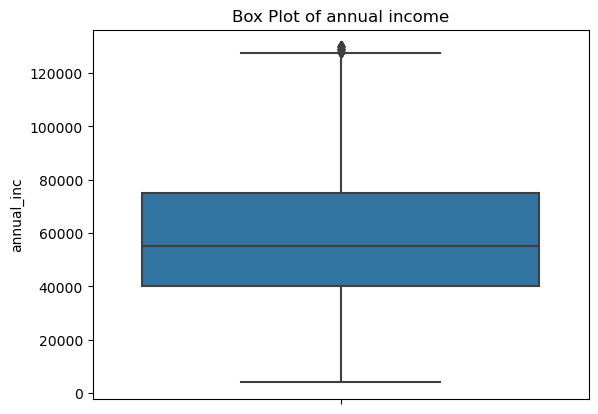

In [22]:
sns.boxplot(y='annual_inc', data = sel_loan_df)
plt.title('Box Plot of annual income')
plt.show()

In [23]:
sel_loan_df.annual_inc.describe()

count     36977.000000
mean      59540.501073
std       25975.139049
min        4000.000000
25%       40000.000000
50%       55000.000000
75%       75000.000000
max      129996.000000
Name: annual_inc, dtype: float64

In [24]:
sel_loan_df.funded_amnt.describe()

count    36977.000000
mean     10483.075966
std       6818.306627
min        500.000000
25%       5000.000000
50%       9000.000000
75%      14400.000000
max      35000.000000
Name: funded_amnt, dtype: float64

In [25]:
sel_loan_df.int_rate.describe()

count    36977.000000
mean        11.958925
std          3.689280
min          5.420000
25%          8.940000
50%         11.830000
75%         14.420000
max         24.400000
Name: int_rate, dtype: float64

# Type driven matics creation

In [26]:
# creating columns based on the clusters of funded amount, int_rate, annual_income so that we can analyse which category perform the worst
bins_fun_amount = [500, 5000, 10000, 15000, 20000, 25000, 30000, 35000]
labels_fun_amount = ['under 5k', 'under 10k', 'under 15k', 'under 20k', 'under 25k', 'under 30k', 'under 35k']
bins_int_rate = [5, 10, 15, 20, 25]
labels_int_rate = ['5-10', '10-15', '15-20', '20-25']
bins_ann_inc = [0, 25000, 50000, 75000, 100000, 125000, 150000]
labels_ann_inc = ['under 25k', 'under 50k', 'under 75k', 'under 100k', 'under 125k', 'under 150k']

sel_loan_df['clustered_funded_amnt'] = pd.cut(sel_loan_df['funded_amnt'], bins=bins_fun_amount, labels=labels_fun_amount, include_lowest=True)
sel_loan_df['clustered_int_rate'] = pd.cut(sel_loan_df['int_rate'], bins=bins_int_rate, labels=labels_int_rate, include_lowest=True)
sel_loan_df['clustered_annual_inc'] = pd.cut(sel_loan_df['annual_inc'], bins=bins_ann_inc, labels=labels_ann_inc, include_lowest=True)

# Data driven matics creation

In [27]:
# creating the ratio matrics between funded_amnt to annual_inc(per year) and  installment to annual_inc(per month) so that we can see burden on the borrower
sel_loan_df['loan_to_income'] = ((sel_loan_df['funded_amnt'])/sel_loan_df['annual_inc']).round(2)
sel_loan_df['installment_to_income'] = ((sel_loan_df['installment']*12)/sel_loan_df['annual_inc']).round(2)
sel_loan_df.head()

,id,funded_amnt,term,int_rate,installment,verification_status,home_ownership,annual_inc,loan_status,purpose,...,grade,addr_state,sub_grade,emp_length,delinq_2yrs,clustered_funded_amnt,clustered_int_rate,clustered_annual_inc,loan_to_income,installment_to_income
0,1077501,5000,36 months,10.65,162.87,Verified,RENT,24000.0,Fully Paid,credit_card,...,B,AZ,B2,10.0,0,under 5k,10-15,under 25k,0.21,0.08
1,1077430,2500,60 months,15.27,59.83,Source Verified,RENT,30000.0,Charged Off,car,...,C,GA,C4,1.0,0,under 5k,15-20,under 50k,0.08,0.02
2,1077175,2400,36 months,15.96,84.33,Not Verified,RENT,12252.0,Fully Paid,small_business,...,C,IL,C5,10.0,0,under 5k,15-20,under 25k,0.20,0.08
3,1076863,10000,36 months,13.49,339.31,Source Verified,RENT,49200.0,Fully Paid,other,...,C,CA,C1,10.0,0,under 10k,10-15,under 50k,0.20,0.08
4,1075358,3000,60 months,12.69,67.79,Source Verified,RENT,80000.0,Current,other,...,B,OR,B5,1.0,0,under 5k,10-15,under 100k,0.04,0.01


checking for outliers in other columns in the next few set of codes

In [28]:
sel_loan_df.dti.describe()

count    36977.000000
mean        13.530409
std          6.672769
min          0.000000
25%          8.430000
50%         13.690000
75%         18.810000
max         29.990000
Name: dti, dtype: float64

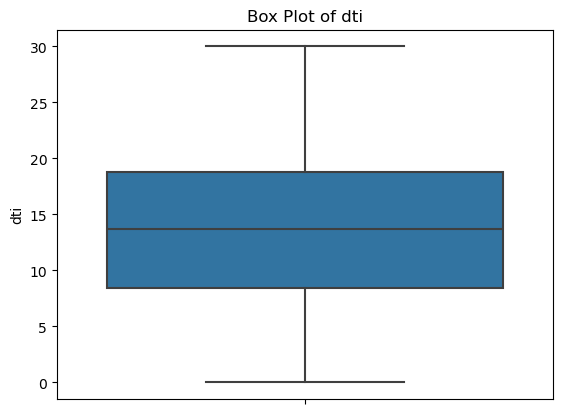

In [29]:
sns.boxplot(y='dti', data = sel_loan_df)
plt.title('Box Plot of dti')
plt.show()

In [30]:
sel_loan_df.grade.value_counts()

grade
B    11221
A     9521
C     7590
D     4935
E     2529
F      917
G      264
Name: count, dtype: int64

# Univariate analysis

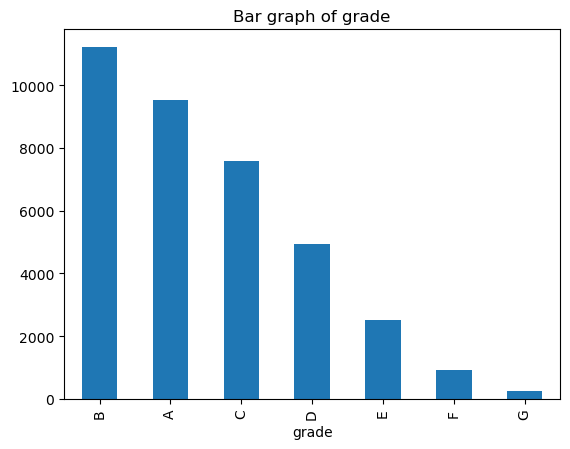

In [31]:
plt.title('Bar graph of grade')
sel_loan_df['grade'].value_counts().plot.bar()
plt.show()

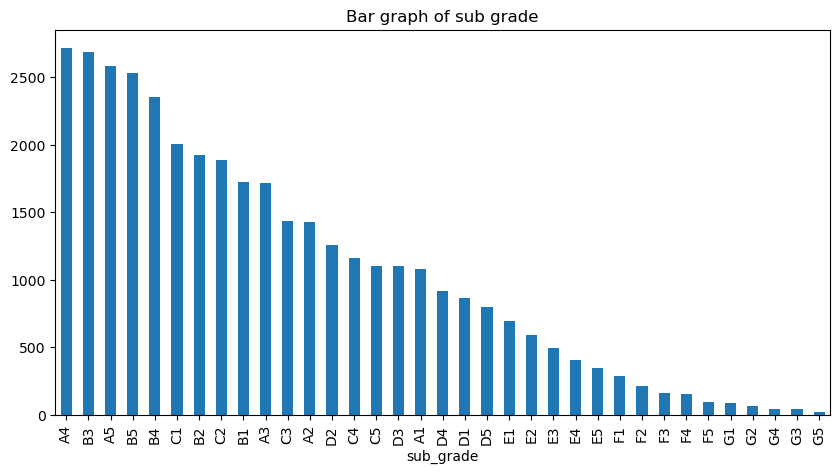

In [32]:
plt.figure(figsize=(10, 5))
plt.title('Bar graph of sub grade')
sel_loan_df['sub_grade'].value_counts().plot.bar()
plt.show()

In [33]:
sel_loan_df.purpose.value_counts()

purpose
debt_consolidation    17535
credit_card            4772
other                  3774
home_improvement       2539
major_purchase         2046
small_business         1654
car                    1481
wedding                 889
medical                 635
moving                  538
vacation                365
house                   344
educational             311
renewable_energy         94
Name: count, dtype: int64

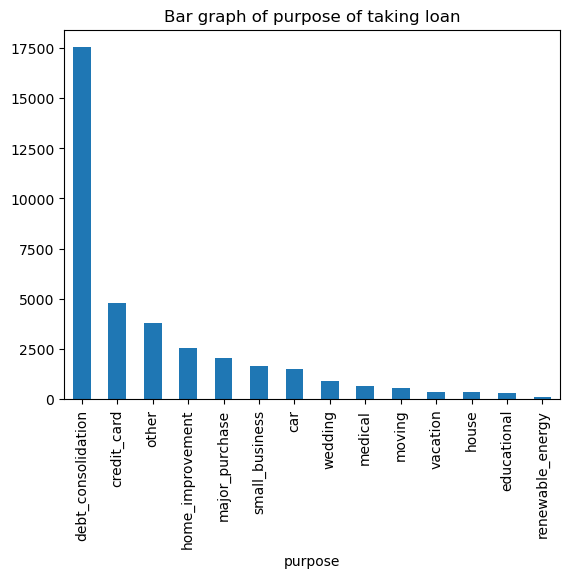

In [34]:
sel_loan_df['purpose'].value_counts().plot.bar()
plt.title('Bar graph of purpose of taking loan')
plt.show()

In [35]:
sel_loan_df.loan_status.value_counts()

loan_status
Fully Paid     30600
Charged Off     5346
Current         1031
Name: count, dtype: int64

In [36]:
#we can remove the data for those whose loan is currently active, since we cannot make much out of it. and also remove those type
# who has paid fully since sel_loan_df_def deals with only defaulter
sel_loan_df_def = sel_loan_df[~(sel_loan_df.loan_status == 'Current')]
sel_loan_df_def = sel_loan_df_def[~(sel_loan_df_def.loan_status == 'Fully Paid')]

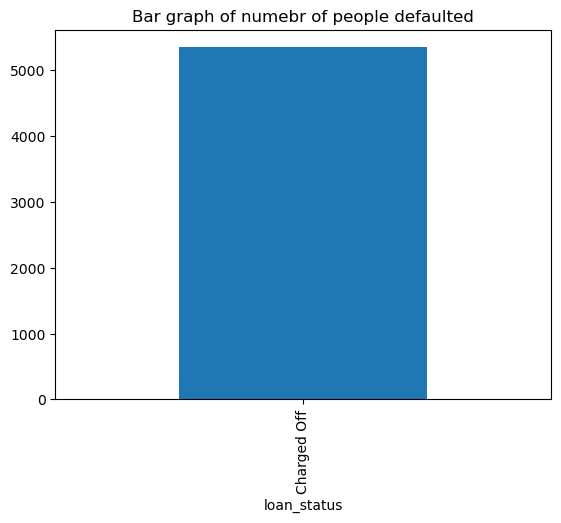

In [37]:
#Plot to represent number of people defaulted 
sel_loan_df_def['loan_status'].value_counts().plot.bar()
plt.title('Bar graph of numebr of people defaulted')
plt.show()

In [38]:
# data frame is extracted only for the applicants who has paid fully
sel_loan_df_fp = sel_loan_df[~(sel_loan_df.loan_status == 'Current')]
sel_loan_df_fp = sel_loan_df_fp[~(sel_loan_df_fp.loan_status == 'Charged Off')]

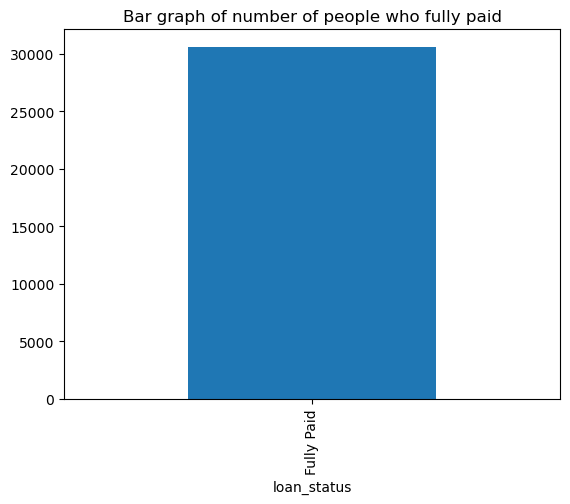

In [39]:
#Plot is drawn to show number of people fully paid loan
sel_loan_df_fp['loan_status'].value_counts().plot.bar()
plt.title('Bar graph of number of people who fully paid')
plt.show()

nearly 30000 people fully paid against 5000+ defaulters. Fully paid are almost 6 times more than defaulters 

In [40]:
sel_loan_df_def.home_ownership.value_counts()

home_ownership
RENT        2756
MORTGAGE    2144
OWN          429
OTHER         17
Name: count, dtype: int64

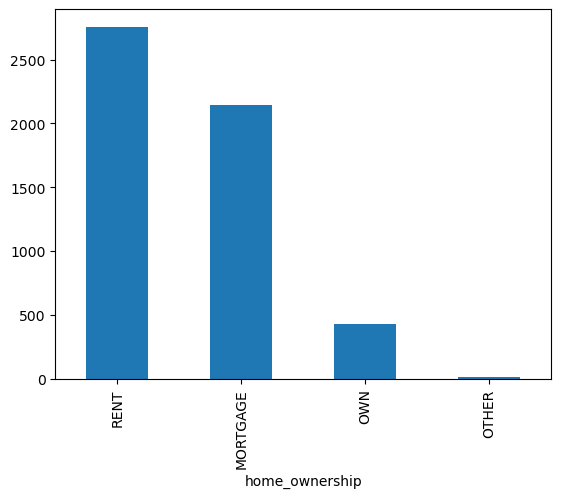

In [41]:
#By plotting bar graph of number of candidates in each category of home ownership we can remove the category which has negligible count.
sel_loan_df_def['home_ownership'].value_counts().plot.bar()
plt.show()

we can remove none and others because their numbers are less than 0.3% of total
values and the informations these attributes will not reveal much. 

In [42]:
sel_loan_df_def = sel_loan_df_def[~sel_loan_df_def['home_ownership'].isin(['OTHER', 'NONE'])]
sel_loan_df_fp  = sel_loan_df_fp[~sel_loan_df_fp['home_ownership'].isin(['OTHER', 'NONE'])]

In [43]:
sel_loan_df_def.home_ownership.value_counts()

home_ownership
RENT        2756
MORTGAGE    2144
OWN          429
Name: count, dtype: int64

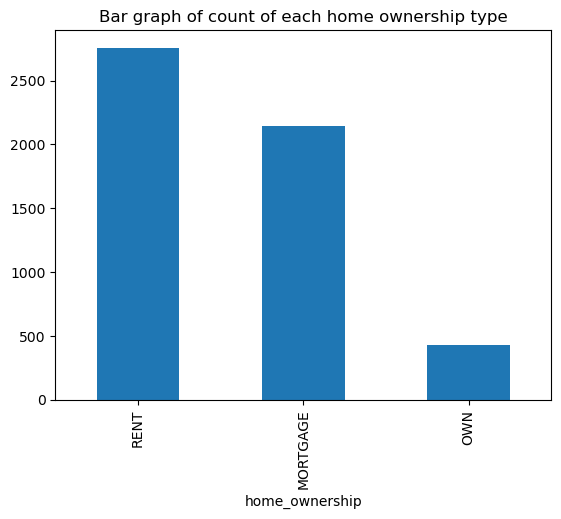

In [44]:
sel_loan_df_def['home_ownership'].value_counts().plot.bar()
plt.title('Bar graph of count of each home ownership type')
plt.show()

In [45]:
sel_loan_df_def.verification_status.value_counts()

verification_status
Not Verified       2069
Verified           1901
Source Verified    1359
Name: count, dtype: int64

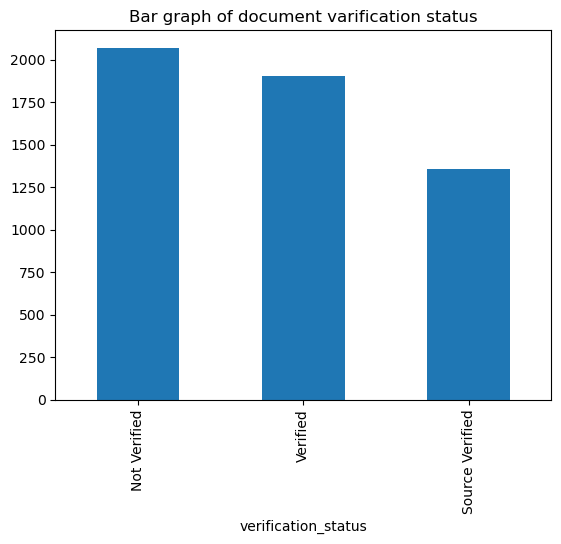

In [46]:
sel_loan_df_def['verification_status'].value_counts().plot.bar()
plt.title('Bar graph of document varification status')
plt.show()

In [47]:
sel_loan_df_def.installment.describe()

count    5329.000000
mean      325.544327
std       209.359202
min        22.790000
25%       166.630000
50%       284.300000
75%       438.070000
max      1305.190000
Name: installment, dtype: float64

In [48]:
sel_loan_df_def = sel_loan_df_def[sel_loan_df_def.installment< 900]
sel_loan_df_def.installment.describe()

count    5255.000000
mean      316.113165
std       194.613150
min        22.790000
25%       165.595000
50%       280.910000
75%       426.355000
max       898.310000
Name: installment, dtype: float64

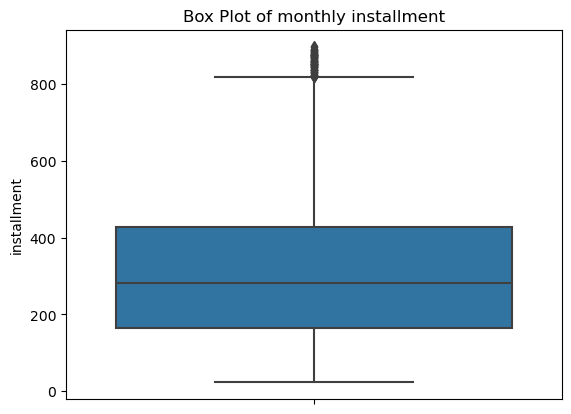

In [49]:
sns.boxplot(y='installment', data = sel_loan_df_def)
plt.title('Box Plot of monthly installment')
plt.show()

In [50]:
sel_loan_df_def.int_rate.describe()

count    5255.000000
mean       13.684457
std         3.591065
min         5.420000
25%        11.140000
50%        13.490000
75%        16.290000
max        24.400000
Name: int_rate, dtype: float64

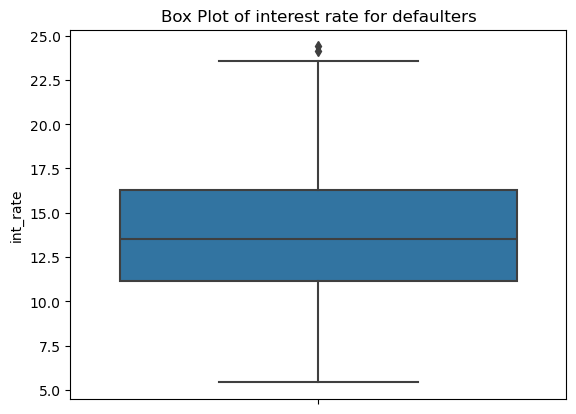

In [51]:
sns.boxplot(y='int_rate', data = sel_loan_df_def)
plt.title('Box Plot of interest rate for defaulters')
plt.show()

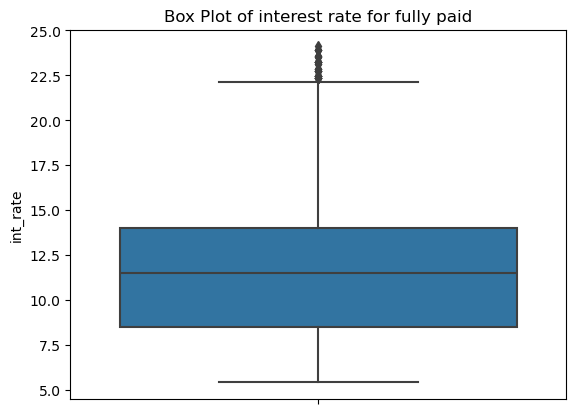

In [52]:
sns.boxplot(y='int_rate', data = sel_loan_df_fp)
plt.title('Box Plot of interest rate for fully paid')
plt.show()

we can see clearly that fully paid are the one who fortunately got lesser interest rates compared to defaulters

In [53]:
sel_loan_df_def.funded_amnt.describe()

count     5255.000000
mean     11106.598478
std       7136.616150
min        900.000000
25%       5100.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64

In [54]:
sel_loan_df_def = sel_loan_df_def[sel_loan_df_def.funded_amnt< 27000]
sel_loan_df_def.funded_amnt.describe()

count     5124.000000
mean     10575.014637
std       6378.732359
min        900.000000
25%       5000.000000
50%       9800.000000
75%      15000.000000
max      26775.000000
Name: funded_amnt, dtype: float64

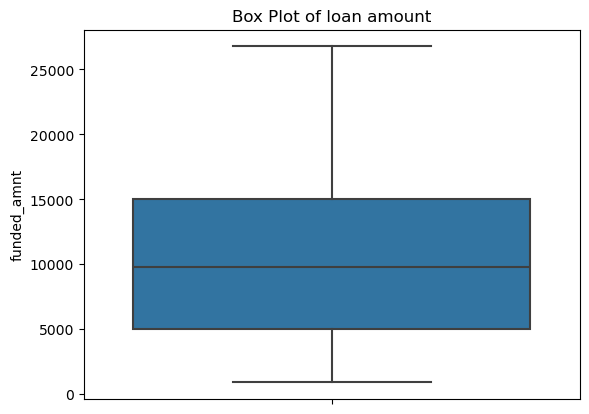

In [55]:
sns.boxplot(y='funded_amnt', data = sel_loan_df_def)
plt.title('Box Plot of loan amount')
plt.show()

In [56]:
sel_loan_df_def.delinq_2yrs.value_counts()

delinq_2yrs
0    4508
1     458
2     108
3      32
4      13
5       2
7       1
6       1
8       1
Name: count, dtype: int64

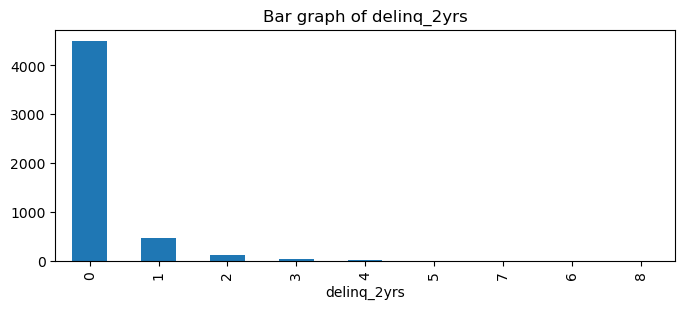

In [57]:
plt.figure(figsize=(8, 3))
sel_loan_df_def['delinq_2yrs'].value_counts().plot.bar()
plt.title('Bar graph of delinq_2yrs')
plt.show()

In [58]:
sel_loan_df_def.addr_state.value_counts().head()

addr_state
CA    1017
FL     463
NY     453
TX     271
NJ     253
Name: count, dtype: int64

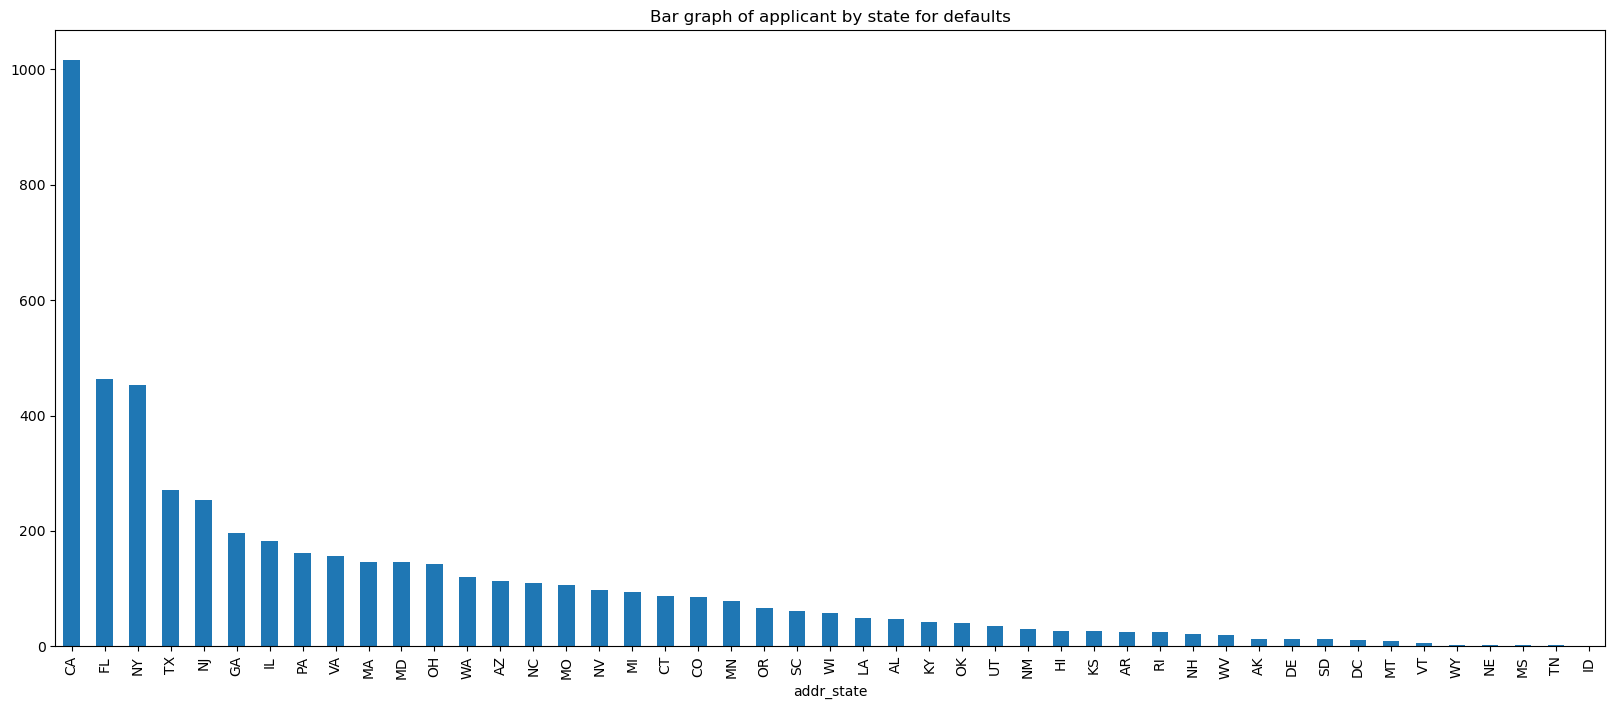

In [59]:
plt.figure(figsize=(20, 8))
sel_loan_df_def['addr_state'].value_counts().plot.bar()
plt.title('Bar graph of applicant by state for defaults')
plt.show()

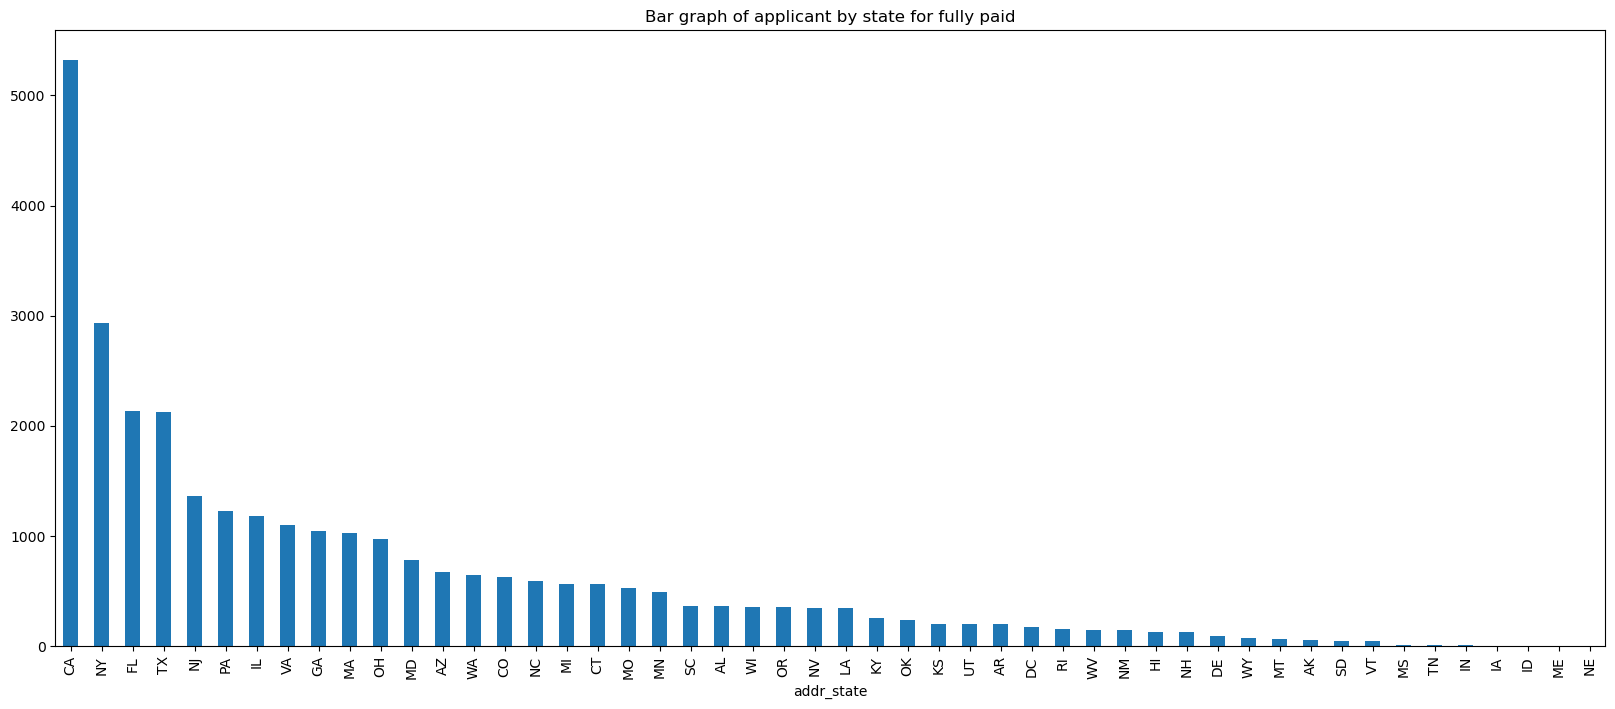

In [60]:
plt.figure(figsize=(20, 8))
sel_loan_df_fp['addr_state'].value_counts().plot.bar()
plt.title('Bar graph of applicant by state for fully paid')
plt.show()

we can see that states like CA NY TX are perfoming better compared to states like FL.

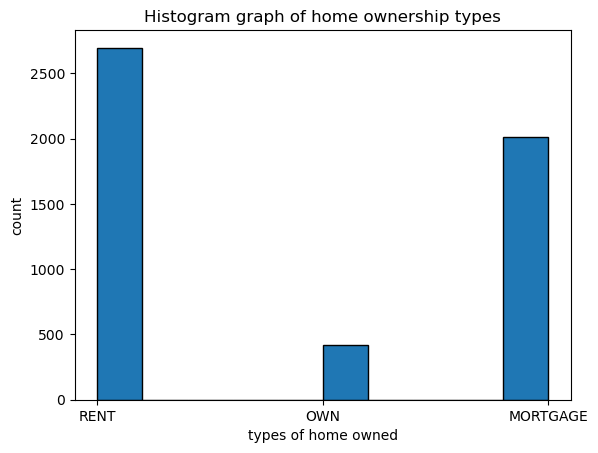

In [61]:
plt.hist(sel_loan_df_def.home_ownership, bins=10, edgecolor='black')
plt.title('Histogram graph of home ownership types')
plt.xlabel('types of home owned')
plt.ylabel('count')
plt.show()

The graph says the number of people who has "own" type are tend to have less defaultes than those who have "rented or Mortage".

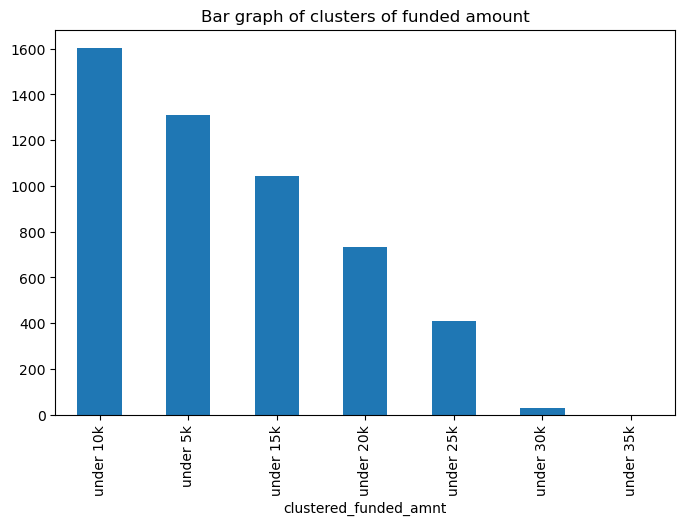

In [62]:
plt.figure(figsize=(8, 5))
sel_loan_df_def['clustered_funded_amnt'].value_counts().plot.bar()
plt.title('Bar graph of clusters of funded amount')
plt.show()

most of the loans given ranges from 5-10k, followed by below 5k, then 10-15k, then 15-20k

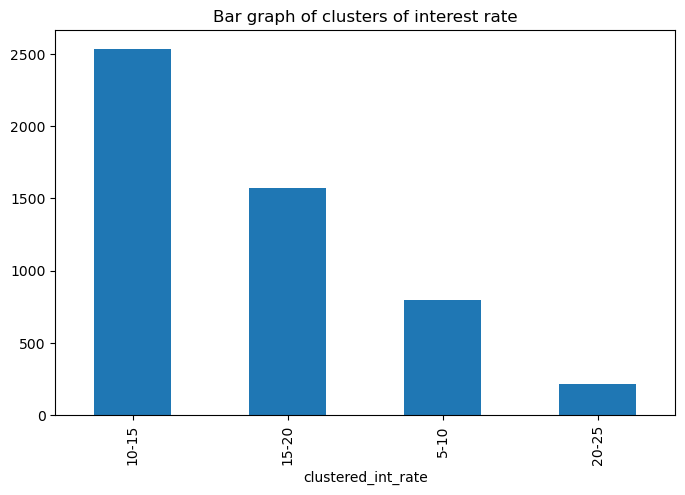

In [63]:
plt.figure(figsize=(8, 5))
sel_loan_df_def['clustered_int_rate'].value_counts().plot.bar()
plt.title('Bar graph of clusters of interest rate')
plt.show()

The highest number of defaulters are given the loan with the interest rate of 10-15 then 15-20 followed by 5-10. 
this gives clear indication that most of the people are not able to pay the loan because of the higher interest.

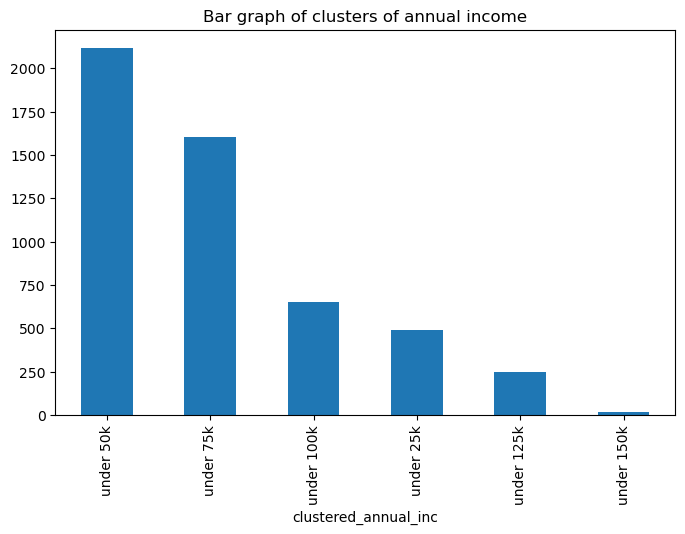

In [64]:
plt.figure(figsize=(8, 5))
sel_loan_df_def['clustered_annual_inc'].value_counts().plot.bar()
plt.title('Bar graph of clusters of annual income')
plt.show()

borrowers whose income is less are tend to be defaulters than those whose income is higher. This can be analysed clearly
with the the fund to income and installment to income ratio. This we can do it in the segmented univariant analysis in the next session

# Business driven matrics

In [65]:
sel_loan_df_def.loan_to_income.describe()

count    5124.000000
mean        0.211881
std         0.122078
min         0.010000
25%         0.120000
50%         0.190000
75%         0.290000
max         0.770000
Name: loan_to_income, dtype: float64

In [66]:
sel_loan_df_def.installment_to_income.describe()

count    5124.000000
mean        0.073468
std         0.042148
min         0.000000
25%         0.040000
50%         0.070000
75%         0.100000
max         0.300000
Name: installment_to_income, dtype: float64

In [67]:
# installment to income and loan to income data are categorised based as 'less_likely', 'more_likely' dependending on the value of the respective columns as below so that we can get some insights on fresh applicants with higher ratios can be ignored.
bins_inst_to_inc = [0, 0.07, 0.3]
labels_inst_to_inc = ['less_likely', 'more_likely']
bins_ln_to_inc = [0, 0.19, 0.8]
labels_ln_to_inc =  ['less_likely', 'more_likely']

sel_loan_df_def['inst_to_inc_def'] = pd.cut(sel_loan_df_def['installment_to_income'], bins=bins_inst_to_inc, labels=labels_inst_to_inc, include_lowest=True)
sel_loan_df_def['ln_to_inc_def'] = pd.cut(sel_loan_df_def['loan_to_income'], bins=bins_ln_to_inc, labels=labels_ln_to_inc, include_lowest=True)

# segmented univariate analysis

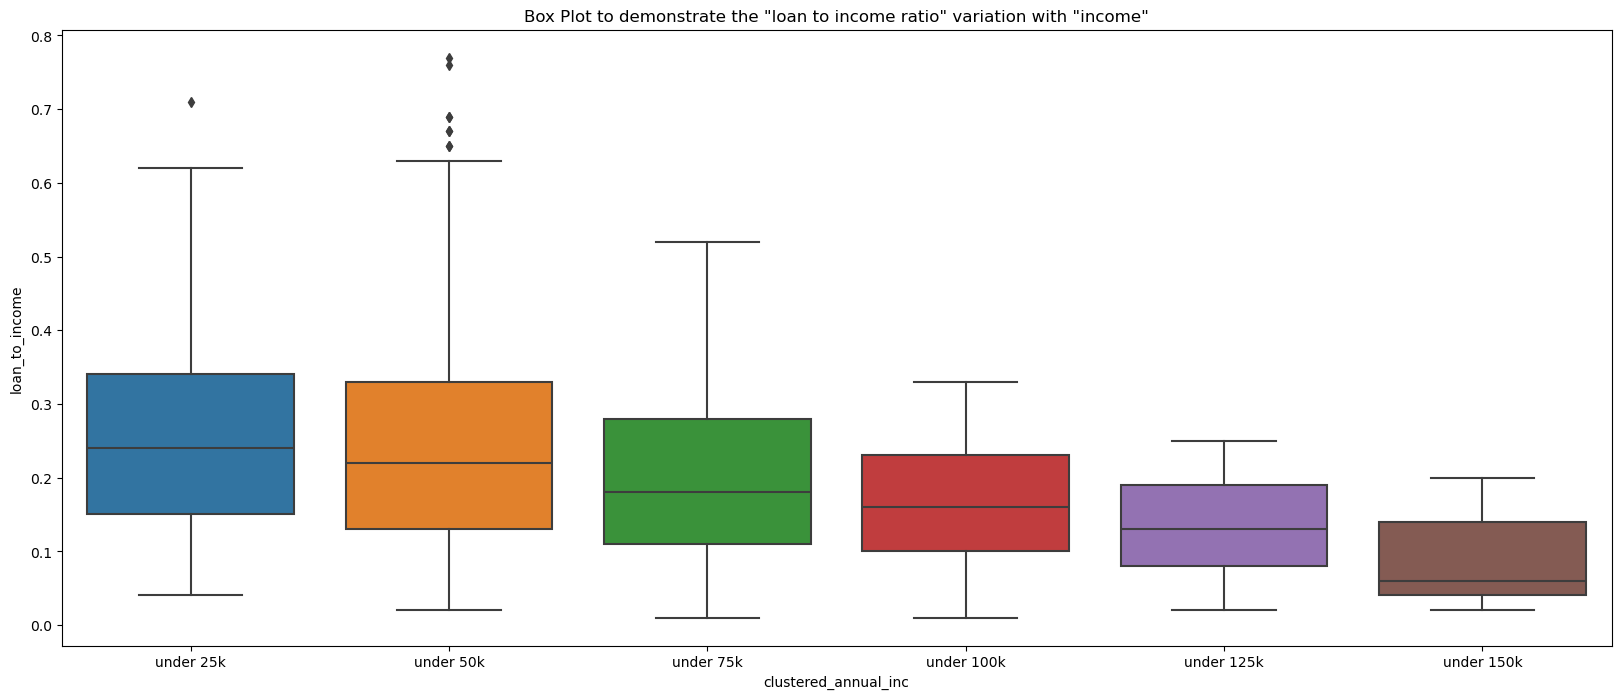

In [68]:
plt.figure(figsize=(20, 8))
sns.boxplot(x='clustered_annual_inc', y='loan_to_income', data=sel_loan_df_def)
plt.title('Box Plot to demonstrate the "loan to income ratio" variation with "income"')
plt.show()

when it comes to borrowers whose income is less are given bad loans than those who has higher income

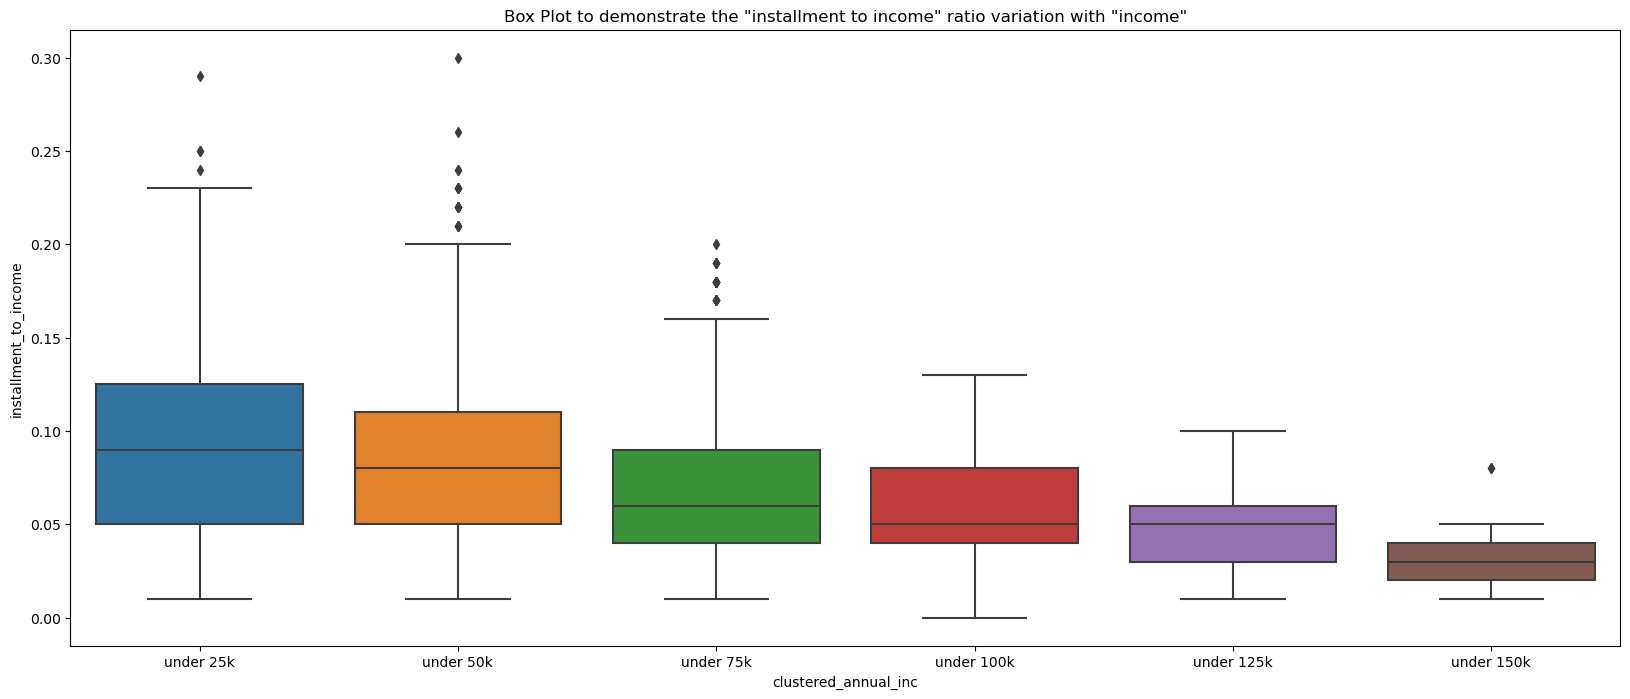

In [69]:
plt.figure(figsize=(20, 8))
sns.boxplot(x='clustered_annual_inc', y='installment_to_income', data=sel_loan_df_def)
plt.title('Box Plot to demonstrate the "installment to income" ratio variation with "income"')
plt.show()

Again the observation is same, when it comes to borrowers whose income is less are given bad loans than those who has higher income

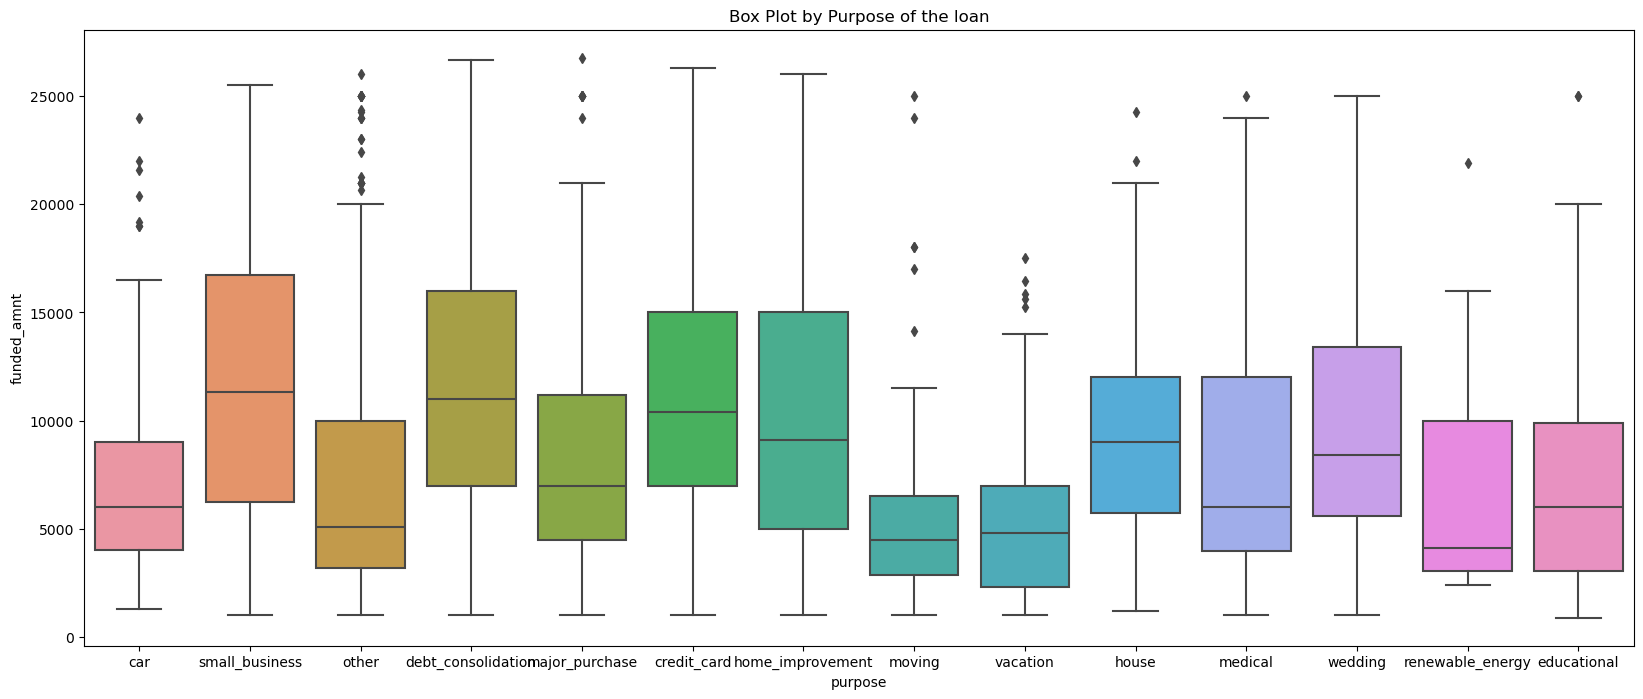

In [70]:
plt.figure(figsize=(20, 8))
sns.boxplot(x='purpose', y='funded_amnt', data=sel_loan_df_def)
plt.title('Box Plot by Purpose of the loan')
plt.show()

Credit card, Small business, debt consolidation home improvement and wedding are the reasons generaly higher loan are expected. 
As expected The loan moslty taken for general expenses are charged off

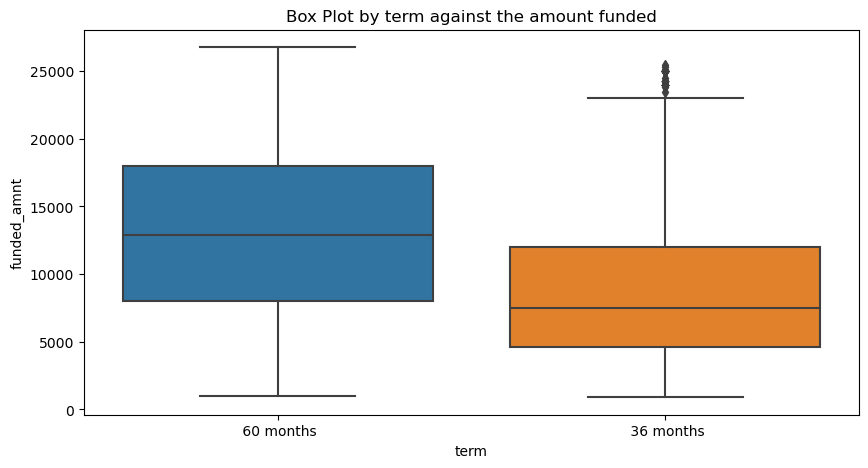

In [71]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='term', y='funded_amnt', data=sel_loan_df_def)
plt.title('Box Plot by term against the amount funded')
plt.show()

There is a clear indication that when the loan amount is more people tend to go for more duration of the loan tenure. 
bigger the loan then they go for 60 months

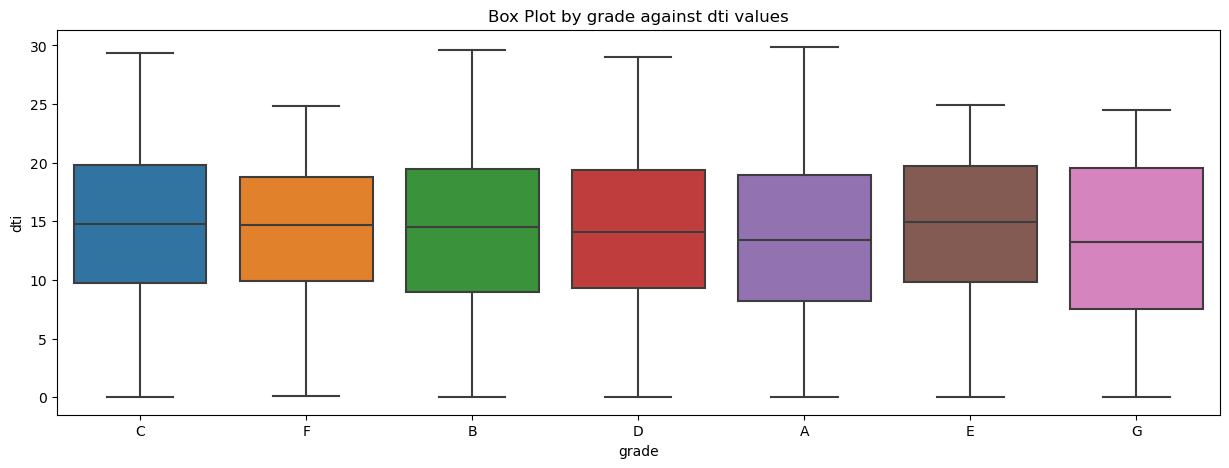

In [72]:
plt.figure(figsize=(15, 5))
sns.boxplot(x='grade', y='dti', data=sel_loan_df_def)
plt.title('Box Plot by grade against dti values')
plt.show()

Above data is not helpful

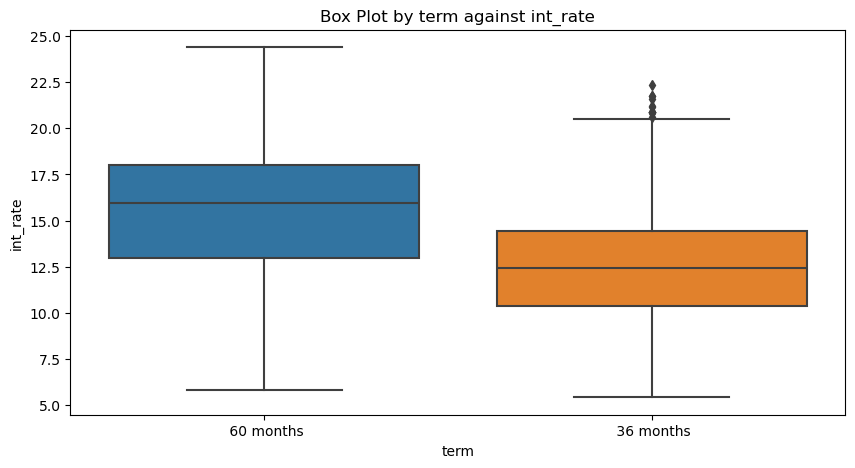

In [73]:
plt.figure(figsize=(10, 5))
sns.boxplot(y='int_rate', x='term', data=sel_loan_df_def)
plt.title('Box Plot by term against int_rate')
plt.show()

Surprisingly the interest rate is increasing as the tenure of the loan is increased

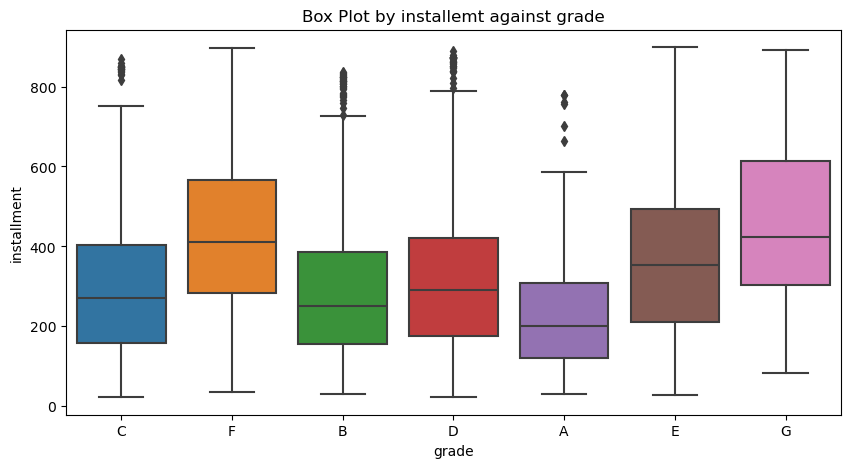

In [74]:

plt.figure(figsize=(10, 5))
sns.boxplot(y='installment', x='grade', data=sel_loan_df_def)
plt.title('Box Plot by installemt against grade')
plt.show()

As expected the performance of the applicant is inversly related to installment to be paid per month. More the installment lesser is the performace

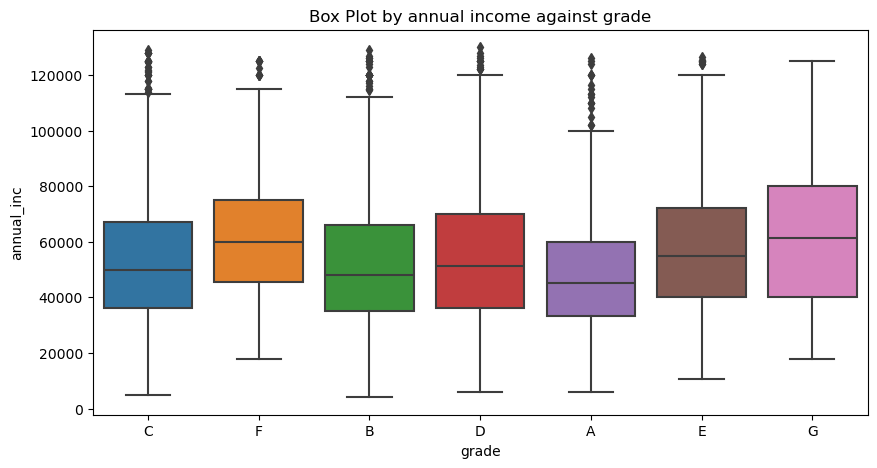

In [75]:
plt.figure(figsize=(10, 5))
sns.boxplot(y='annual_inc', x='grade', data=sel_loan_df_def)
plt.title('Box Plot by annual income against grade')
plt.show()

Surprisingly if income and the grades are inversly propotional. More the income lesser is the performance even though differnce is less

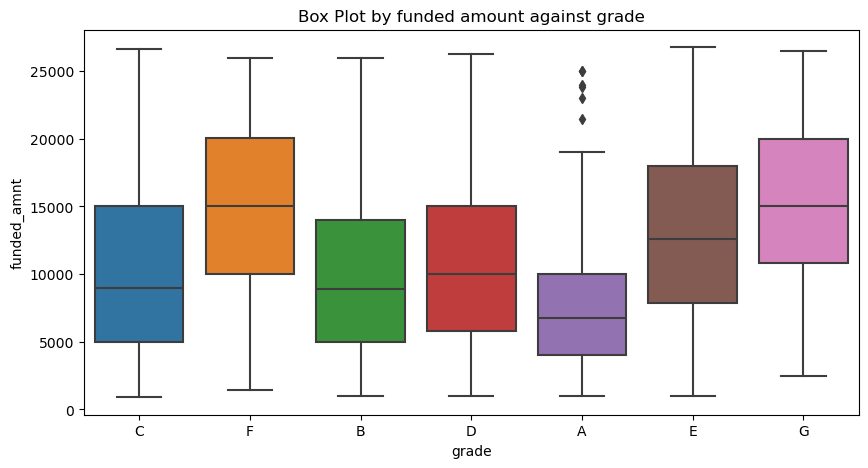

In [76]:
plt.figure(figsize=(10, 5))
sns.boxplot(y='funded_amnt', x='grade', data=sel_loan_df_def)
plt.title('Box Plot by funded amount against grade')
plt.show()

More the funded amount high chance that the performacne of the loan bearer reduces

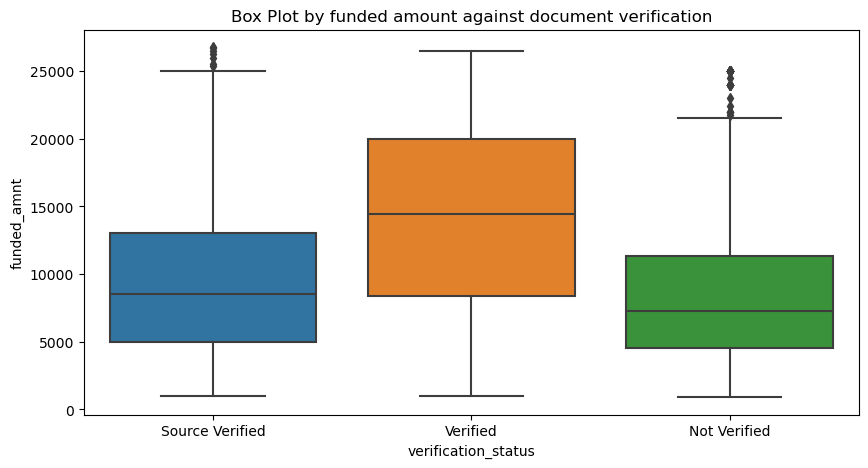

In [77]:
plt.figure(figsize=(10, 5))
sns.boxplot(y='funded_amnt', x='verification_status', data=sel_loan_df_def)
plt.title('Box Plot by funded amount against document verification')
plt.show()

As expected the verification is done completely if the funded amount is more. Even though it is verified the defaulters are still seen if the amount 
is big irrespective of if the docs are verified or not.

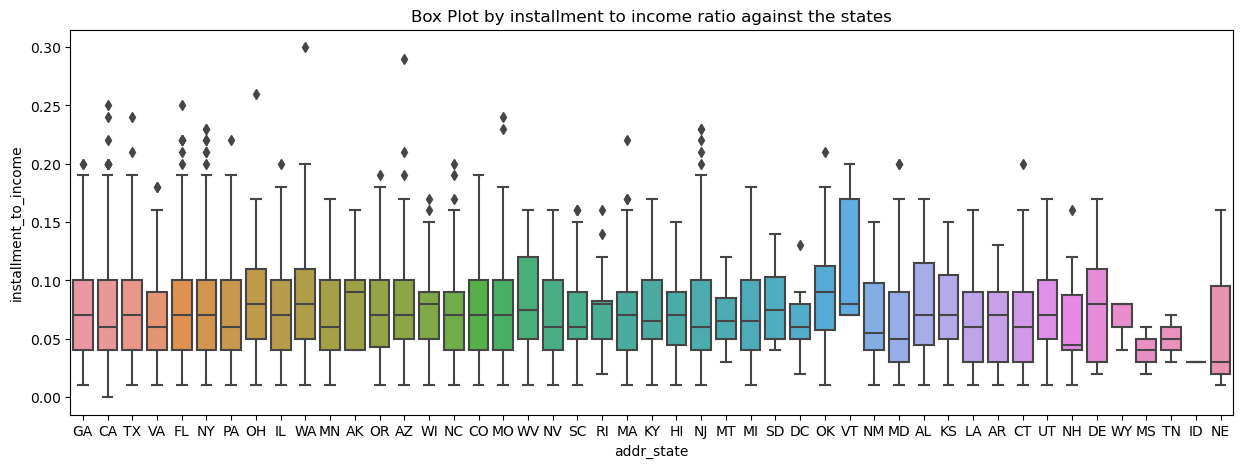

In [78]:
plt.figure(figsize=(15, 5))
sns.boxplot(x='addr_state', y='installment_to_income', data=sel_loan_df_def)
plt.title('Box Plot by installment to income ratio against the states')
plt.show()

States like VT DE WV AL OK are given bad loans compared to the states like DC MS TN

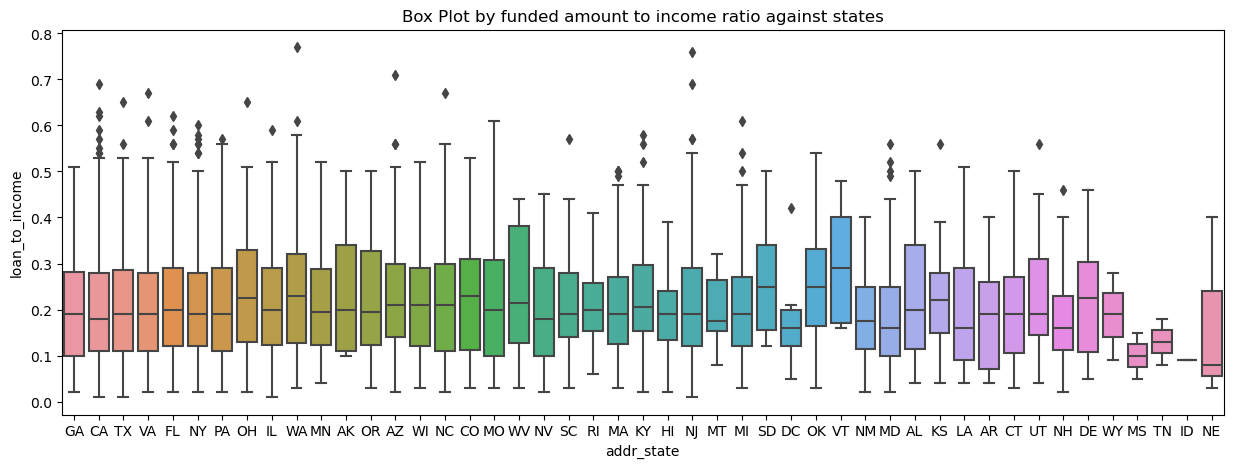

In [79]:
plt.figure(figsize=(15, 5))
sns.boxplot(x='addr_state', y='loan_to_income', data=sel_loan_df_def)
plt.title('Box Plot by funded amount to income ratio against states')
plt.show()

States like VT WV AL OK are given bad loans compared to the states like DC MS TN

# Bivariate analysis

In [80]:
sel_loan_df_def.head()

,id,funded_amnt,term,int_rate,installment,verification_status,home_ownership,annual_inc,loan_status,purpose,...,sub_grade,emp_length,delinq_2yrs,clustered_funded_amnt,clustered_int_rate,clustered_annual_inc,loan_to_income,installment_to_income,inst_to_inc_def,ln_to_inc_def
1,1077430,2500,60 months,15.27,59.83,Source Verified,RENT,30000.0,Charged Off,car,...,C4,1.0,0,under 5k,15-20,under 50k,0.08,0.02,less_likely,less_likely
8,1071795,5600,60 months,21.28,152.39,Source Verified,OWN,40000.0,Charged Off,small_business,...,F2,4.0,0,under 10k,20-25,under 50k,0.14,0.05,less_likely,less_likely
9,1071570,5375,60 months,12.69,121.45,Verified,RENT,15000.0,Charged Off,other,...,B5,1.0,0,under 10k,10-15,under 25k,0.36,0.10,more_likely,more_likely
12,1064687,9000,36 months,13.49,305.38,Source Verified,RENT,30000.0,Charged Off,debt_consolidation,...,C1,1.0,0,under 10k,10-15,under 50k,0.30,0.12,more_likely,more_likely
14,1069057,10000,36 months,10.65,325.74,Source Verified,RENT,100000.0,Charged Off,other,...,B2,3.0,0,under 10k,10-15,under 100k,0.10,0.04,less_likely,less_likely


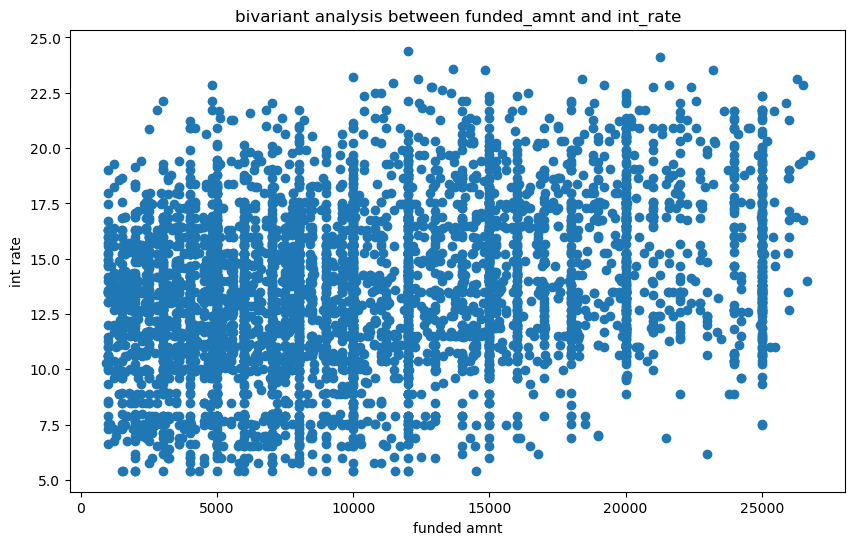

In [81]:
plt.figure(figsize=(10, 6)) 
plt.title('bivariant analysis between funded_amnt and int_rate')
plt.xlabel('funded amnt')
plt.ylabel('int rate')
plt.scatter(sel_loan_df_def.funded_amnt, sel_loan_df_def.int_rate)
plt.show()

interest rate for the funded amount greater than 15000 are generally higher than 7.5 
in contrast we can see the interest rate can come down up to 5 and for lower funded amounts the interest rate are uniform from 5 till 20

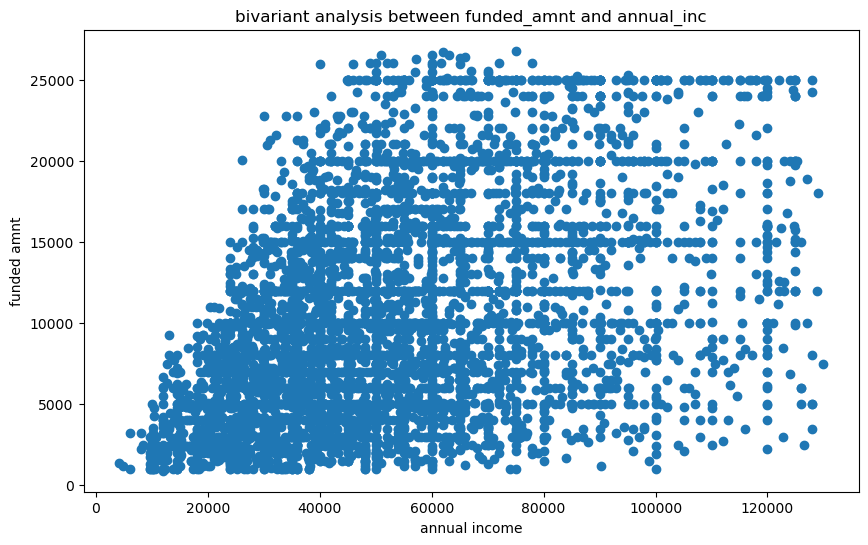

In [82]:
plt.figure(figsize=(10, 6)) 
plt.title('bivariant analysis between funded_amnt and annual_inc')
plt.xlabel('annual income')
plt.ylabel('funded amnt')
plt.scatter(sel_loan_df_def.annual_inc, sel_loan_df_def.funded_amnt)
plt.show()

the count of higher loan dispatched for those whose annual income is around 50k to 70k are tend be more than those whose annual income is more than 80k.
Adding to that, initially the graph goes as a funnel but at the end it becames flat. If we can try to reduce the slope of the graph in
the beginning by doing more strict varification and reduce the funded amount those who has less income 
we can reduce the huge amount of the defaults 

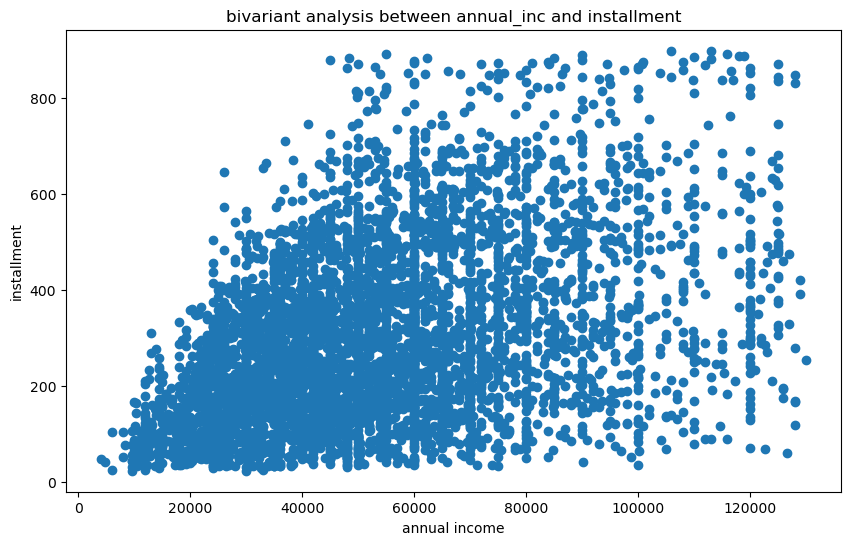

In [83]:
plt.figure(figsize=(10, 6)) 
plt.title('bivariant analysis between annual_inc and installment')
plt.xlabel('annual income')
plt.ylabel('installment')
plt.scatter(sel_loan_df_def.annual_inc, sel_loan_df_def.installment)
plt.show()


the installment in the applicant whose income ranges from 50k to 70k are very high compared to those whose income is above 80k. 
This explanation is similar to the amount_funded explanation
adding to that, initially the graph goes as a funnel but at the end it becames flat. If we can try to reduce the slope of the graph in
the beginning by doing more strict varification and reduce the funded amount to those who has less income we can reduce the huge amount of the defaults 

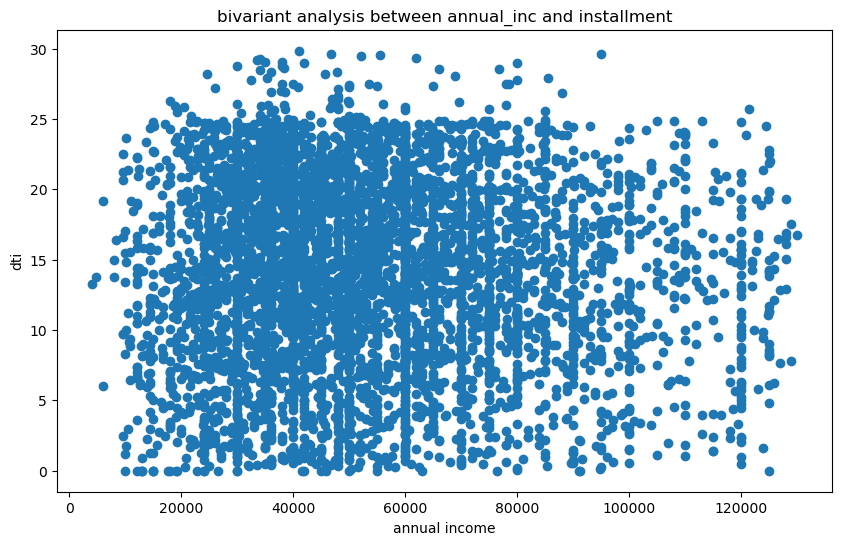

In [84]:
plt.figure(figsize=(10, 6)) 
plt.title('bivariant analysis between annual_inc and installment')
plt.xlabel('annual income')
plt.ylabel('dti')
plt.scatter(sel_loan_df_def.annual_inc, sel_loan_df_def.dti)
plt.show()

no significance information can be extracted from dti

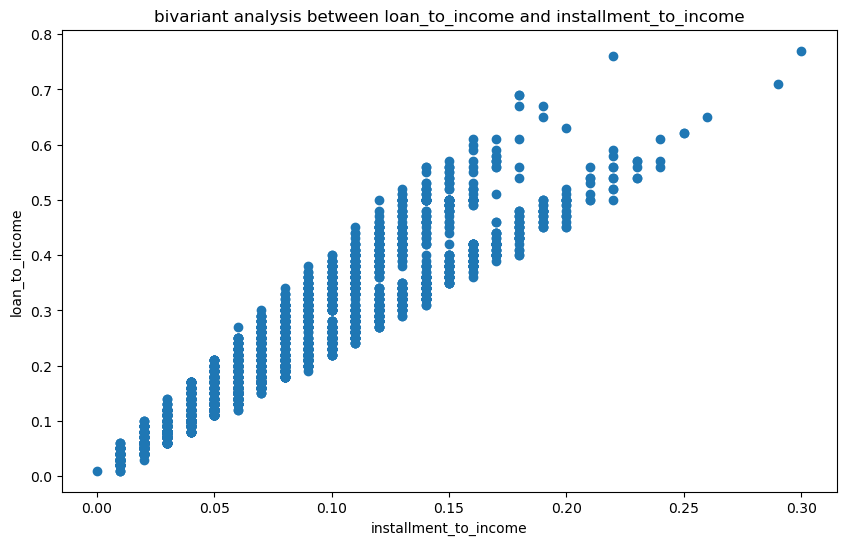

In [85]:
plt.figure(figsize=(10, 6)) 
plt.title('bivariant analysis between loan_to_income and installment_to_income')
plt.xlabel('installment_to_income')
plt.ylabel('loan_to_income')
plt.scatter(sel_loan_df_def.installment_to_income, sel_loan_df_def.loan_to_income)
plt.show()

The parameters which decides the performance of the borrower are directly related to each other. i.e. installment_to_income and loan_to_income are directly proportinal.